In [30]:
import awkward as ak
# import ROOT

In [31]:
Events_ak = ak.from_parquet("Full_output.parquet")

In [32]:
higgs_pt = Events_ak["higgs_pt"]

In [34]:
print(higgs_pt[0])

98.5


In [12]:
# pt_cut = 100.0<higgs_pt<104.0
pt_cut = (higgs_pt >= 100.0) & (higgs_pt < 104.0)

In [13]:
higgs_pt_cut = higgs_pt[pt_cut]

In [14]:
len(higgs_pt_cut)

20401

In [15]:
pt_cut_1 = (higgs_pt >= 100.0) & (higgs_pt < 100.8)
pt_cut_2 = (higgs_pt >= 100.8) & (higgs_pt < 101.6)
pt_cut_3 = (higgs_pt >= 101.6) & (higgs_pt < 102.4)
pt_cut_4 = (higgs_pt >= 102.4) & (higgs_pt < 103.2)
pt_cut_5 = (higgs_pt >= 103.2) & (higgs_pt < 104.0)


In [16]:
print(len(higgs_pt[pt_cut_1]))
print(len(higgs_pt[pt_cut_2]))
print(len(higgs_pt[pt_cut_3]))
print(len(higgs_pt[pt_cut_4]))
print(len(higgs_pt[pt_cut_5]))
print(len(higgs_pt[pt_cut_1])+len(higgs_pt[pt_cut_2])+len(higgs_pt[pt_cut_3])+len(higgs_pt[pt_cut_4])+len(higgs_pt[pt_cut_5]))

5190
3845
3720
3876
3770
20401


In [ ]:
Gen = events["GenPart_pdgId"].array()
print(Gen)

[[2, -1, 24, 25, 24, 25, 24, 25, ..., 22, -511, 523, -421, 521, 421, -421], ...]


In [14]:
type(Gen)

awkward.highlevel.Array

In [15]:
len(Gen)

726000

In [12]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt

In [2]:
file = uproot.open("NANO_merged_20.root")

In [3]:
file.keys()

['tag;2',
 'tag;1',
 'Events;1',
 'LuminosityBlocks;1',
 'Runs;1',
 'MetaData;1',
 'ParameterSets;1']

In [4]:
Events = file["Events"]

In [5]:
Events.keys()

['run',
 'luminosityBlock',
 'event',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_njets25',
 'HTXS_njets30',
 'nboostedTau',
 'boostedTau_chargedIso',
 'boostedTau_eta',
 'boostedTau_leadTkDeltaEta',
 'boostedTau_leadTkDeltaPhi',
 'boostedTau_leadTkPtOverTauPt',
 'boostedTau_mass',
 'boostedTau_neutralIso',
 'boostedTau_phi',
 'boostedTau_photonsOutsideSignalCone',
 'boostedTau_pt',
 'boostedTau_puCorr',
 'boostedTau_rawAntiEle2018',
 'boostedTau_rawIso',
 'boostedTau_rawIsodR03',
 'boostedTau_rawMVAnewDM2017v2',
 'boostedTau_rawMVAoldDM2017v2',
 'boostedTau_rawMVAoldDMdR032017v2',
 'boostedTau_charge',
 'boostedTau_decayMode',
 'boostedTau_je

In [17]:
import uproot
import awkward as ak

tree = uproot.open("NANO_merged_20.root")["Events"]
events = tree.arrays(["GenPart_pt", "GenPart_pdgId", "GenPart_status"])

# Apply mask with awkward
higgs_mask = (events["GenPart_pdgId"] == 25) & (events["GenPart_status"] == 62)
higgs_pt_awkward = events["GenPart_pt"][higgs_mask]

# Convert to NumPy (flattened)
higgs_pt_flat = ak.to_numpy(ak.flatten(higgs_pt_awkward))

In [19]:
np.array(Events["Pileup_nTrueInt"]).shape

(997000,)

In [19]:
len(higgs_pt_flat)

997000

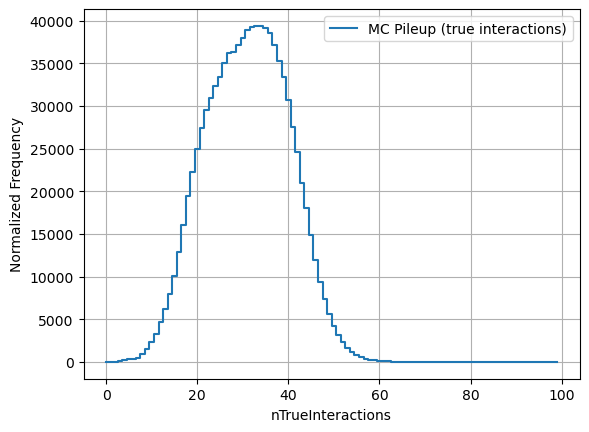

In [ ]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

mc_file = "NANO_merged_20.root"   # your MC NanoAOD file
tree_name = "Events"

# Read nTrueInteractions
with uproot.open(mc_file) as f:
    nTrue = f[tree_name]["Pileup_nTrueInt"].array(library="np")

# Bin the histogram to match your data pileupCalc output
bins = np.linspace(0, 100, 101)  # adjust max bin according to data hist
mc_counts, bin_edges = np.histogram(nTrue, bins=bins)

# Normalize for shape comparison
# mc_pdf = mc_counts / mc_counts.sum()
mc_pdf = mc_counts

plt.step(bin_edges[:-1], mc_pdf, where='mid', label="MC Pileup (true interactions)")
plt.xlabel("nTrueInteractions")
plt.ylabel("Normalized Frequency")
plt.grid(True)
plt.legend()
plt.show()


In [20]:
with uproot.open(mc_file, timeout=120) as Hfile:
    print(Hfile.keys())
    Tree = Hfile["Events"]  # can access TTrees by name
    # Tree_2 = Hfile["Runs"]  # can access TTrees by name
    Events = Tree.arrays(library="ak", how="zip")

['tag;2', 'tag;1', 'Events;1', 'LuminosityBlocks;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1']


In [30]:
with uproot.open(mc_file, timeout=120) as Hfile:
    print(Hfile.keys())
    Tree_2 = Hfile["LuminosityBlocks"]  # can access TTrees by name
    # Tree_2 = Hfile["Runs"]  # can access TTrees by name
    Runs = Tree_2.arrays(library="ak", how="zip")

['tag;2', 'tag;1', 'Events;1', 'LuminosityBlocks;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1']


In [34]:
Events["nPhoton"]

<Array [2, 1, 1, 4, 1, 1, 1, ..., 1, 2, 1, 0, 3, 1, 2] type='997000 * uint32'>

In [31]:
Runs

<Array [{run: 1, ...}, ..., {run: 1, ...}] type='997 * {run: uint32, lumino...'>

In [37]:
import uproot
url = "root://xrootd-cms.infn.it//store/mc/RunIISummer20UL18NanoAODv9/WHToAA_AToBB_AToGG_M-20_TuneCP5_13TeV_madgraph_pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/2530000/52967538-6671-C748-9CEC-C21D276D640B.root"
with uproot.open(url) as f:
    print(f["Events"].keys())
    print(len(f["Events"].keys()))


['run', 'luminosityBlock', 'event', 'HTXS_Higgs_pt', 'HTXS_Higgs_y', 'HTXS_stage1_1_cat_pTjet25GeV', 'HTXS_stage1_1_cat_pTjet30GeV', 'HTXS_stage1_1_fine_cat_pTjet25GeV', 'HTXS_stage1_1_fine_cat_pTjet30GeV', 'HTXS_stage1_2_cat_pTjet25GeV', 'HTXS_stage1_2_cat_pTjet30GeV', 'HTXS_stage1_2_fine_cat_pTjet25GeV', 'HTXS_stage1_2_fine_cat_pTjet30GeV', 'HTXS_stage_0', 'HTXS_stage_1_pTjet25', 'HTXS_stage_1_pTjet30', 'HTXS_njets25', 'HTXS_njets30', 'nboostedTau', 'boostedTau_chargedIso', 'boostedTau_eta', 'boostedTau_leadTkDeltaEta', 'boostedTau_leadTkDeltaPhi', 'boostedTau_leadTkPtOverTauPt', 'boostedTau_mass', 'boostedTau_neutralIso', 'boostedTau_phi', 'boostedTau_photonsOutsideSignalCone', 'boostedTau_pt', 'boostedTau_puCorr', 'boostedTau_rawAntiEle2018', 'boostedTau_rawIso', 'boostedTau_rawIsodR03', 'boostedTau_rawMVAnewDM2017v2', 'boostedTau_rawMVAoldDM2017v2', 'boostedTau_rawMVAoldDMdR032017v2', 'boostedTau_charge', 'boostedTau_decayMode', 'boostedTau_jetIdx', 'boostedTau_rawAntiEleCat2018',

In [ ]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak

filename = "NANO_merged_20.root:Events"  # Note the ':Events'

events = NanoEventsFactory.from_root(
    filename,
    schemaclass=NanoAODSchema
).events()

len_per_event = ak.num(events.Photon)  # awkward array of photon counts
print(len_per_event)

print(events.Photon.fields)


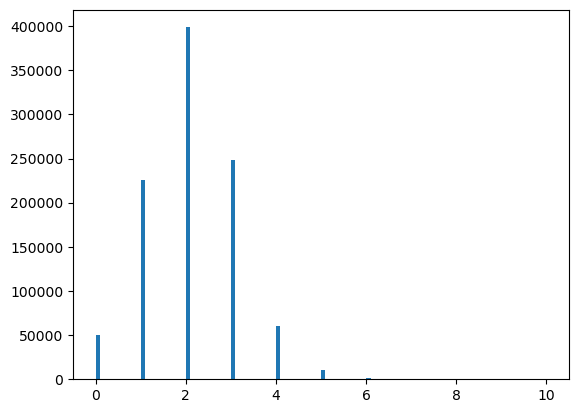

In [8]:
import matplotlib.pyplot as plt
plt.hist(len_per_event, range = (0,10), bins = 100);

In [1]:
import awkward as ak
all_events = ak.from_parquet("2018_WH_all_datasets.parquet")

In [5]:
all_events

<Array [{dataset: 'M25', data: ..., ...}, ...] type='2 * {dataset: string, ...'>

In [29]:
pu = all_events["data"][1]["pu_true"]
pu0 = all_events["data"][0]["pu_true"]

In [6]:
pu25 = all_events[(all_events.dataset == "M25")].data

In [10]:
ak.to_numpy(pu25["pu_true"])[0]

array([33., 27., 42., ..., 39., 40., 30.])

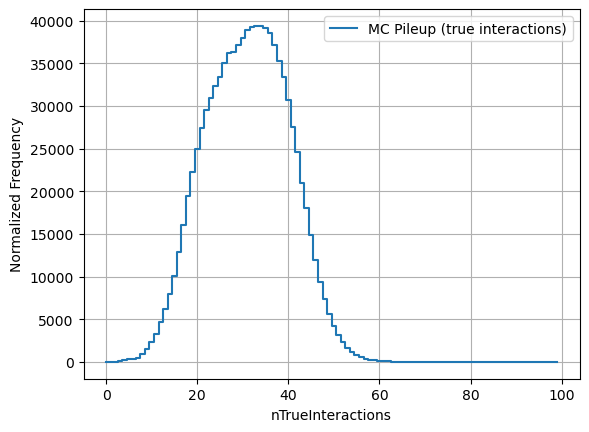

In [28]:
import numpy as np
import matplotlib.pyplot as plt
bins = np.linspace(0, 100, 101)  # adjust max bin according to data hist
mc_counts, bin_edges = np.histogram(pu, bins=bins)

# Normalize for shape comparison
# mc_pdf = mc_counts / mc_counts.sum()
mc_pdf = mc_counts

plt.step(bin_edges[:-1], mc_pdf, where='mid', label="MC Pileup (true interactions)")
plt.xlabel("nTrueInteractions")
plt.ylabel("Normalized Frequency")
plt.grid(True)
plt.legend()
plt.show()

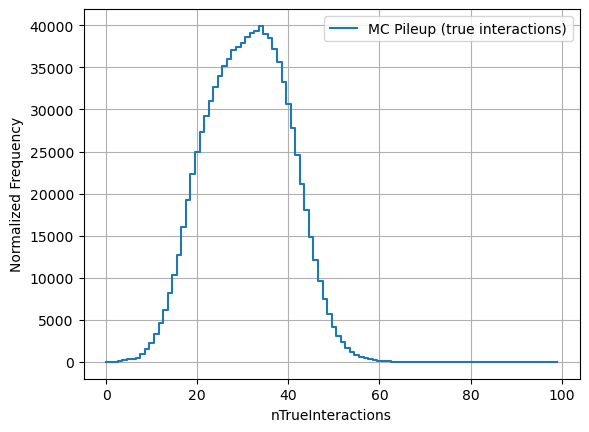

In [30]:
import numpy as np
import matplotlib.pyplot as plt
bins = np.linspace(0, 100, 101)  # adjust max bin according to data hist
mc_counts, bin_edges = np.histogram(pu0, bins=bins)

# Normalize for shape comparison
# mc_pdf = mc_counts / mc_counts.sum()
mc_pdf = mc_counts

plt.step(bin_edges[:-1], mc_pdf, where='mid', label="MC Pileup (true interactions)")
plt.xlabel("nTrueInteractions")
plt.ylabel("Normalized Frequency")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
All_Events = ak.from_parquet("WH_all_datasets.parquet")

In [12]:
All_Events

<Array [{dataset: ..., ...}, {...}, ..., {...}] type='36 * {dataset: string...'>

In [17]:
with open("dataset_name.txt", "w") as f:
    for dataset in All_Events.dataset:
        print(dataset, file=f)


In [21]:
ak.to_list(All_Events.dataset)

['M55_RunIISummer20UL18NanoAODv9',
 'M60_RunIISummer20UL18NanoAODv9',
 'M50_RunIISummer20UL18NanoAODv9',
 'M45_RunIISummer20UL18NanoAODv9',
 'M40_RunIISummer20UL18NanoAODv9',
 'M35_RunIISummer20UL18NanoAODv9',
 'M30_RunIISummer20UL18NanoAODv9',
 'M25_RunIISummer20UL18NanoAODv9',
 'M20_RunIISummer20UL18NanoAODv9',
 'M60_RunIISummer20UL17NanoAODv9',
 'M55_RunIISummer20UL17NanoAODv9',
 'M50_RunIISummer20UL17NanoAODv9',
 'M45_RunIISummer20UL17NanoAODv9',
 'M40_RunIISummer20UL17NanoAODv9',
 'M35_RunIISummer20UL17NanoAODv9',
 'M30_RunIISummer20UL17NanoAODv9',
 'M25_RunIISummer20UL17NanoAODv9',
 'M20_RunIISummer20UL17NanoAODv9',
 'M60_RunIISummer20UL16NanoAODv9',
 'M55_RunIISummer20UL16NanoAODv9',
 'M45_RunIISummer20UL16NanoAODv9',
 'M50_RunIISummer20UL16NanoAODv9',
 'M40_RunIISummer20UL16NanoAODv9',
 'M35_RunIISummer20UL16NanoAODv9',
 'M30_RunIISummer20UL16NanoAODv9',
 'M25_RunIISummer20UL16NanoAODv9',
 'M20_RunIISummer20UL16NanoAODv9',
 'M60_RunIISummer20UL16NanoAODAPVv9',
 'M55_RunIISummer

In [1]:
import awkward as ak
Events = ak.from_parquet("AllDatasets.parquet")

In [26]:
ak.to_list(Events.dataset)

['M20_RunIISummer20UL16NanoAODAPVv9',
 'M20_RunIISummer20UL16NanoAODv9',
 'M20_RunIISummer20UL17NanoAODv9',
 'M20_RunIISummer20UL18NanoAODv9',
 'M25_RunIISummer20UL16NanoAODAPVv9',
 'M25_RunIISummer20UL16NanoAODv9',
 'M25_RunIISummer20UL17NanoAODv9',
 'M25_RunIISummer20UL18NanoAODv9',
 'M30_RunIISummer20UL16NanoAODAPVv9',
 'M30_RunIISummer20UL16NanoAODv9',
 'M30_RunIISummer20UL17NanoAODv9',
 'M30_RunIISummer20UL18NanoAODv9',
 'M35_RunIISummer20UL16NanoAODAPVv9',
 'M35_RunIISummer20UL16NanoAODv9',
 'M35_RunIISummer20UL17NanoAODv9',
 'M35_RunIISummer20UL18NanoAODv9',
 'M40_RunIISummer20UL16NanoAODAPVv9',
 'M40_RunIISummer20UL16NanoAODv9',
 'M40_RunIISummer20UL17NanoAODv9',
 'M40_RunIISummer20UL18NanoAODv9',
 'M45_RunIISummer20UL16NanoAODAPVv9',
 'M45_RunIISummer20UL16NanoAODv9',
 'M45_RunIISummer20UL17NanoAODv9',
 'M45_RunIISummer20UL18NanoAODv9',
 'M50_RunIISummer20UL16NanoAODAPVv9',
 'M50_RunIISummer20UL16NanoAODv9',
 'M50_RunIISummer20UL17NanoAODv9',
 'M50_RunIISummer20UL18NanoAODv9',

In [3]:
Events["dataset"]

<Array ['M20_RunIISummer20UL16NanoAODAPVv9', ...] type='36 * string'>

In [ ]:
m20_data = Events[Events["dataset"] == "M25_RunIISummer20UL17NanoAODv9"]
# print(len(m25_data), "events from M25")

In [22]:
m20_data["gen_lead_b_pt"]

<Array [[31.7, 43.9, 33.6, ..., 32.6, 22.6, 59.8]] type='1 * var * float64'>

In [24]:
m20_data.fields

['pu_true',
 'nPhoton',
 'higgs_pt',
 'higgs_eta',
 'higgs_phi',
 'A_pt_1',
 'A_pt_2',
 'A_eta_1',
 'A_eta_2',
 'A_phi_1',
 'A_phi_2',
 'leading_A_pt',
 'subleading_A_pt',
 'leading_A_eta',
 'subleading_A_eta',
 'leading_A_phi',
 'subleading_A_phi',
 'pho_from_a_pt_1',
 'pho_from_a_pt_2',
 'pho_from_a_eta_1',
 'pho_from_a_eta_2',
 'pho_from_a_phi_1',
 'pho_from_a_phi_2',
 'lead_pt_pho_gen',
 'sublead_pt_pho_gen',
 'lead_eta_pho_gen',
 'sublead_eta_pho_gen',
 'lead_phi_pho_gen',
 'sublead_phi_pho_gen',
 'bquark_from_a_pt_1',
 'bquark_from_a_pt_2',
 'bquark_from_a_eta_1',
 'bquark_from_a_eta_2',
 'bquark_from_a_phi_1',
 'bquark_from_a_phi_2',
 'lead_pt_bquark_gen',
 'sublead_pt_bquark_gen',
 'lead_eta_bquark_gen',
 'sublead_eta_bquark_gen',
 'lead_phi_bquark_gen',
 'sublead_phi_bquark_gen',
 'Reco_pho_pt',
 'Reco_pho_eta',
 'Reco_pho_phi',
 'Reco_photon_lead_pt_all',
 'Reco_photon_sublead_pt_all',
 'Reco_photon_lead_eta_all',
 'Reco_photon_sublead_eta_all',
 'Reco_photon_lead_phi_all',
 

In [23]:
ak.to_numpy(m20_data["gen_lead_b_pt"])[0]

array([31.6875, 43.875 , 33.625 , ..., 32.625 , 22.625 , 59.75  ])

In [21]:
m20_data.Reco_photon_lead_pt_all[0]

<Array [56.2, 78.7, 46.3, 58.5, ..., 31.1, 37.4, 53.9] type='901271 * float64'>

In [17]:
import numpy as np
arr_np = ak.to_numpy(m20_data.Reco_photon_sublead_pt_all[0])

# Count non-NaN entries
count_non_nan = np.sum(~np.isnan(arr_np))

print(count_non_nan)

693966


In [1]:
import awkward as ak

In [2]:
Events = ak.from_parquet("AllDatasets_ZH.parquet")

In [6]:
Events_2 = ak.from_parquet("AllDatasets.parquet")

In [3]:
m25_data = Events[Events["dataset"] == "M20_RunIISummer20UL16NanoAODAPVv9"]

In [7]:
m25_data_2 = Events_2[Events_2["dataset"] == "M20_RunIISummer20UL16NanoAODAPVv9"]

In [5]:
m25_data["dataset"]

<Array ['M20_RunIISummer20UL16NanoAODAPVv9'] type='1 * string'>

In [9]:
m25_data_2.fields

['pu_true',
 'nPhoton',
 'higgs_pt',
 'higgs_eta',
 'higgs_phi',
 'A_pt_1',
 'A_pt_2',
 'A_eta_1',
 'A_eta_2',
 'A_phi_1',
 'A_phi_2',
 'leading_A_pt',
 'subleading_A_pt',
 'leading_A_eta',
 'subleading_A_eta',
 'leading_A_phi',
 'subleading_A_phi',
 'pho_from_a_pt_1',
 'pho_from_a_pt_2',
 'pho_from_a_eta_1',
 'pho_from_a_eta_2',
 'pho_from_a_phi_1',
 'pho_from_a_phi_2',
 'lead_pt_pho_gen',
 'sublead_pt_pho_gen',
 'lead_eta_pho_gen',
 'sublead_eta_pho_gen',
 'lead_phi_pho_gen',
 'sublead_phi_pho_gen',
 'bquark_from_a_pt_1',
 'bquark_from_a_pt_2',
 'bquark_from_a_eta_1',
 'bquark_from_a_eta_2',
 'bquark_from_a_phi_1',
 'bquark_from_a_phi_2',
 'lead_pt_bquark_gen',
 'sublead_pt_bquark_gen',
 'lead_eta_bquark_gen',
 'sublead_eta_bquark_gen',
 'lead_phi_bquark_gen',
 'sublead_phi_bquark_gen',
 'Reco_pho_pt',
 'Reco_pho_eta',
 'Reco_pho_phi',
 'Reco_photon_lead_pt_all',
 'Reco_photon_sublead_pt_all',
 'Reco_photon_lead_eta_all',
 'Reco_photon_sublead_eta_all',
 'Reco_photon_lead_phi_all',
 

In [4]:
import awkward as ak
Events = ak.from_parquet("parquet_files_ZH/M60_RunIISummer20UL16NanoAODAPVv9.parquet")

In [5]:
Events.fields

['pu_true',
 'nPhoton',
 'nPhoton_cut_10',
 'nPhoton_cut_18',
 'nPhoton_cut_30',
 'higgs_pt',
 'higgs_eta',
 'higgs_phi',
 'A_pt_1',
 'A_pt_2',
 'A_eta_1',
 'A_eta_2',
 'A_phi_1',
 'A_phi_2',
 'leading_A_pt',
 'subleading_A_pt',
 'leading_A_eta',
 'subleading_A_eta',
 'leading_A_phi',
 'subleading_A_phi',
 'pho_from_a_pt_1',
 'pho_from_a_pt_2',
 'pho_from_a_eta_1',
 'pho_from_a_eta_2',
 'pho_from_a_phi_1',
 'pho_from_a_phi_2',
 'lead_pt_pho_gen',
 'sublead_pt_pho_gen',
 'lead_eta_pho_gen',
 'sublead_eta_pho_gen',
 'lead_phi_pho_gen',
 'sublead_phi_pho_gen',
 'bquark_from_a_pt_1',
 'bquark_from_a_pt_2',
 'bquark_from_a_eta_1',
 'bquark_from_a_eta_2',
 'bquark_from_a_phi_1',
 'bquark_from_a_phi_2',
 'lead_pt_bquark_gen',
 'sublead_pt_bquark_gen',
 'lead_eta_bquark_gen',
 'sublead_eta_bquark_gen',
 'lead_phi_bquark_gen',
 'sublead_phi_bquark_gen',
 'Reco_pho_pt',
 'Reco_pho_eta',
 'Reco_pho_phi',
 'Reco_photon_lead_pt_all',
 'Reco_photon_sublead_pt_all',
 'Reco_photon_lead_eta_all',
 'Rec

In [12]:
import ROOT

# Suppose you already have Events.nPhoton_cut_10 as a numpy or awkward array
import numpy as np
arr = np.array(Events.nPhoton_cut_10)  # convert to numpy if needed

# Define histogram
nbins = 50
xmin = min(arr)
xmax = max(arr)
h = ROOT.TH1F("h", "nPhoton_cut_10;N_{photons};Events", nbins, xmin, xmax)

# Fill histogram
for val in arr:
    h.Fill(val)

# Draw
c = ROOT.TCanvas("c", "c", 800, 600)
h.Draw()
c.SaveAs("nPhoton_cut_10.png")


Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file nPhoton_cut_10.png has been created


In [11]:
arr_18 = np.array(Events.nPhoton_cut_18)  # convert to numpy if needed

# Define histogram
nbins = 50
xmin = min(arr)
xmax = max(arr)
h_18 = ROOT.TH1F("h", "nPhoton_cut_18;N_{photons};Events", nbins, xmin, xmax)

# Fill histogram
for val in arr_18:
    h_18.Fill(val)

# Draw
c_18 = ROOT.TCanvas("c_18", "c_18", 800, 600)
h_18.Draw()
c_18.SaveAs("nPhoton_cut_18.png")

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_18
Info in <TCanvas::Print>: png file nPhoton_cut_18.png has been created


In [13]:
arr_30 = np.array(Events.nPhoton_cut_30)  # convert to numpy if needed

# Define histogram
nbins = 50
xmin = min(arr)
xmax = max(arr)
h_30 = ROOT.TH1F("h", "nPhoton_cut_30;N_{photons};Events", nbins, xmin, xmax)

# Fill histogram
for val in arr_30:
    h_30.Fill(val)

# Draw
c_30 = ROOT.TCanvas("c_30", "c_30", 800, 600)
h_30.Draw()
c_30.SaveAs("nPhoton_cut_30.png")

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: png file nPhoton_cut_30.png has been created
